# Multiple Regression and Model Validation - Introduction

## Objectives
You will be able to:
* Understand and explain what is covered in this section
* Understand and explain why the section will help you to become a data scientist

## Multiple Linear Regression

- Simple linear regression:  $X \sim Y$ where $X$ is a feature and $Y$ is a target variable.

- Multiple linear regression: $(X_{1}, X_{2}, \cdots, X_{n}) \sim Y$ again $Y$ is the target variable.

## Improving a Baseline Model

- Recall that we used $R^{2}$ score to assess our simple linear model's performance. 

- As # of variables increases in the model $R^{2}$ score always increases. 

- We should find another ways of assessing the performance of the model.


## Dealing with Categorical Variables

- How do we integrate categorical variables into our model?

## Multicollinearity of Features

- What does it mean to have multicollinearity in the data and why is this a problem for multiple linear models?

## Multiple Linear Regression in Statsmodels

After covering a lot of the key theory, you'll then get some hands-on practice in performing multiple linear regressions using the Statsmodels and Scikit-learn libraries.

## Model Fit and Validation

- Does our model good for prediction?

## 1. Review of Simple Linear Regression

In [3]:
import pandas as pd
## Read data from Income2.csv as df_income
## Print the first five rows of the dataframe
df_income = pd.read_csv('Income2.csv', index_col=0)
df_income.head()

Education   Seniority     Income
1  21.586207  113.103448  99.917173
2  18.275862  119.310345  92.579135
3  12.068966  100.689655  34.678727
4  17.034483  187.586207  78.702806
5  19.931034   20.000000  68.009922

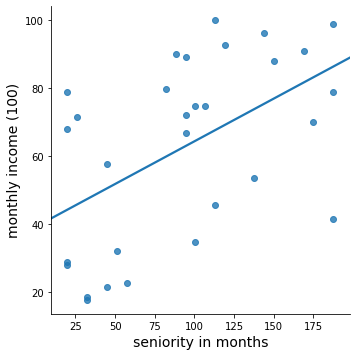

In [4]:
## plot the regression line 
## for seniority and income
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#seaborn linear model plot
sns.lmplot(x = 'Seniority', y= 'Income', data = df_income, ci = None);
plt.xlabel('seniority in months', fontsize=14)
plt.ylabel('monthly income (100)', fontsize=14)
plt.show()

In [7]:
## a very quick simple linear model implementation with statsmodel.api
import statsmodels.api as sm

X = df_income.Seniority.values
y = df_income.Income.values
X = sm.add_constant(X)
mod = sm.OLS(y, X, hasconst=True)
res = mod.fit()
res.summary()

#%load -r 13:19 answers.py

# uses f-statistic as result of ANOVA to compare B1 = B2 = B3 = BN = 0 
# to see if at least 1 is not 0 to test variance 

# rsquared tells you the model explains 27% of the varability of y

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     10.28
Date:                Thu, 10 Oct 2019   Prob (F-statistic):            0.00335
Time:                        10:03:33   Log-Likelihood:                -136.26
No. Observations:                  30   AIC:                             276.5
Df Residuals:                      28   BIC:                             279.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.1583      8.516      4.598      0.000      21.714      56.602
x1             0.2513      0.078      3.207      0.003       0.091       0.412
==============================================================================
Omnibus:                        7.403   Durbin-Watson:                   2.410
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                2.253
Skew:                          -0.208   Prob(JB):                        0.324
Kurtosis:                       1.724   Cond. No.                         216.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2. Adding Extra Features 

- Obviously mothly income depends many other variables:
    - Education level
    - num of hours worked
    - Employement rate
    - Sector
    - etc.
 
In that sense, if we add in years of education as a predictor, then we should update the formula as :

$$  \text{income} = \beta_{0} + \beta_{1} \times \text{years of education} + \beta_{2} \times \text{seniority}$$

Visuallity this corresponds to fitting a plane to a set of numbers in three dimensions:

<img src="images/multiple_reg.png" width="500">

More generally, the linear model is expressed as:

$$ \hat{y} = \hat{\beta}_{0} + \hat{\beta}_{1}X_{1} + \cdots + \hat{\beta}_{p} X_{p}$$ 

and as we are fitting the model we are trying to minimize:

$$ \text{Residual Sum of Squares} = f(\hat{\beta}_{0}, \cdots, \hat{\beta}_{p}) =\sum\limits_{i=1}^{N}(y_{i} - \hat{y}_{i})^{2}$$


In [8]:
# %load -r 2:10 answers.py 
X = df_income[['Education', 'Seniority']].values
y = df_income['Income']
X = sm.add_constant(X)

model = sm.OLS(y, X, hasconst=True)
res = model.fit()

res.summary()

#Prob(F-statistic) = p-value... in this case very low p-value

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     191.4
Date:                Thu, 10 Oct 2019   Prob (F-statistic):           1.13e-16
Time:                        10:22:22   Log-Likelihood:                -100.15
No. Observations:                  30   AIC:                             206.3
Df Residuals:                      27   BIC:                             210.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -50.0856      5.999     -8.349      0.000     -62.394     -37.777
x1             5.8956      0.357     16.513      0.000       5.163       6.628
x2             0.1729      0.024      7.079      0.000       0.123       0.223
==============================================================================
Omnibus:                        3.352   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.187   Jarque-Bera (JB):                2.672
Skew:                           0.729   Prob(JB):                        0.263
Kurtosis:                       2.892   Cond. No.                         502.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__How to analyze result__

a) F_statistics and corresponding F-probability tests whether at least one of the features explains the target variable or not. More specifically, null-hypothesis is:

$$ H_{0}: \beta_{1} = \cdots = \beta_{p} = 0 $$

For more on this: Read ISLR p75-77

b) If we find a significant F-score then the next obvious question is which features exactly explains the target variable significantly. More importantly, we would like to answer, which variables we should keep in our final analysis.

For more on this: Read ISLR p78-79

c) To understand, the fit of the model to the problem at hand we will still use $R^{2}$ score.



### 3. Categorical Variables

In [9]:
## Let's import a new dataset
import pandas as pd
data = pd.read_csv('auto-mpg.csv')
# First convert horsepower into a string and then to int
data['horsepower'] = data['horsepower'].astype(str).astype(int)
data.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0         130    3504          12.0   
1  15.0          8         350.0         165    3693          11.5   
2  18.0          8         318.0         150    3436          11.0   
3  16.0          8         304.0         150    3433          12.0   
4  17.0          8         302.0         140    3449          10.5   

   model year  origin                   car name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino

In [10]:
## Check the types of the columns - use info method from pandas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
model year      392 non-null int64
origin          392 non-null int64
car name        392 non-null object
dtypes: float64(3), int64(5), object(1)
memory usage: 27.6+ KB


In [11]:
data.origin.value_counts()
#definitely categorical

1    245
3     79
2     68
Name: origin, dtype: int64

In [14]:
data.horsepower.value_counts()
#probably not categorical - continuous

150    22
90     20
88     19
110    18
100    17
95     14
75     14
105    12
67     12
70     12
65     10
85      9
97      9
80      7
145     7
140     7
72      6
68      6
78      6
92      6
84      6
60      5
170     5
175     5
180     5
115     5
71      5
86      5
130     5
76      4
       ..
66      1
230     1
82      1
89      1
220     1
210     1
208     1
200     1
193     1
167     1
158     1
152     1
149     1
148     1
142     1
138     1
137     1
135     1
133     1
132     1
122     1
116     1
113     1
108     1
107     1
103     1
94      1
93      1
91      1
102     1
Name: horsepower, Length: 93, dtype: int64

In [17]:
data['model year'].value_counts()
# ordinal data, there is an order, and differences between values make sense
# can treat as continuous
# difficult to decide 
# because you could subtract 70 from every number and the order and relation stays

# NO right thing here to how you treat it
# BUT definitely different than categories that are US, EU, AS

73    40
78    36
76    34
82    30
75    30
79    29
70    29
81    28
77    28
72    28
80    27
71    27
74    26
Name: model year, dtype: int64

**Problem when you don't have continuous variables because linear model assumes relationship between numbers.**

Ordinals have a ranking

But categorical variables do not have relationship between numbers


**SOLUTION**

create binaries
pd.get_dummies()


NEED TO IDENTIFY categorical variables in data and try to exclude



you can run model with colinerarity
but you cannot use coefficients, CIs or p-values because interpretation is lost

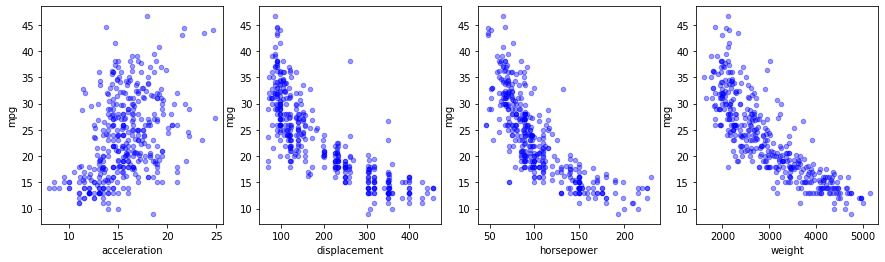

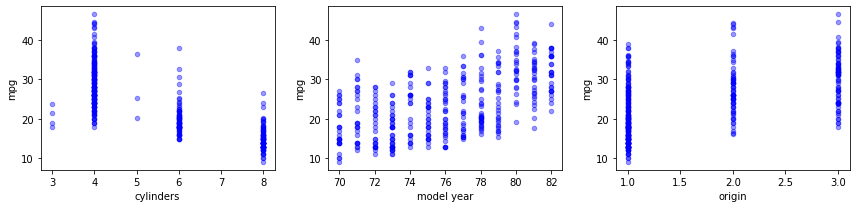

In [18]:
## plotting variables in scatter plots

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,4))

for xcol, ax in zip(['acceleration', 'displacement', 'horsepower', 'weight'], axes):
    data.plot(kind='scatter', x=xcol, y='mpg', ax=ax, alpha=0.4, color='b')
    
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,3))

for xcol, ax in zip([ 'cylinders', 'model year', 'origin'], axes):
    data.plot(kind='scatter', x=xcol, y='mpg', ax=ax, alpha=0.4, color='b')
plt.tight_layout()

#you can see that the top ones have patterns and are continuous
#whereas the bottom three are categorical because of the scatter distribution

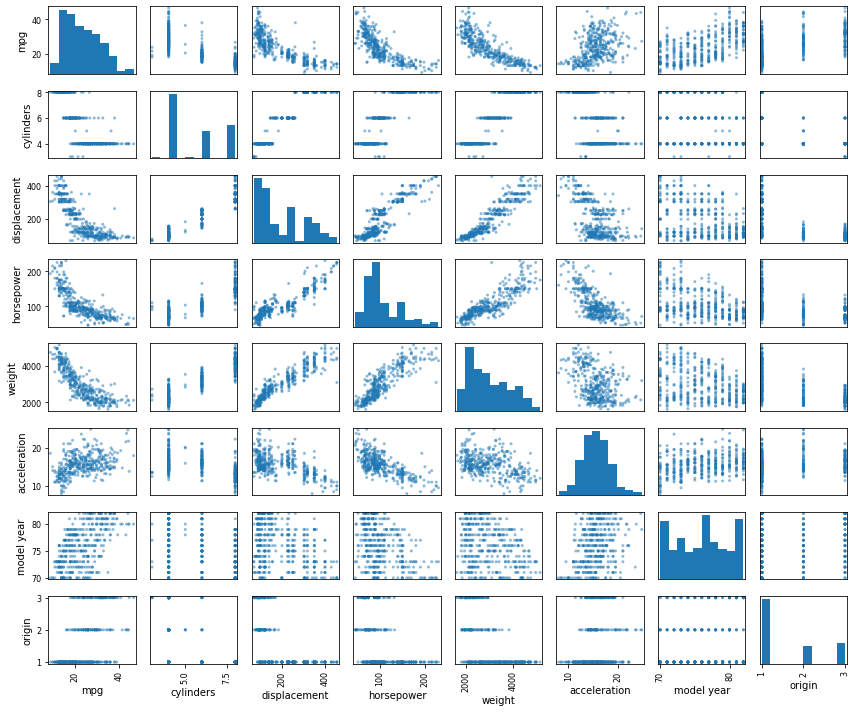

In [174]:
## Another way of plotting variables = Scatter matrix
pd.plotting.scatter_matrix(data, figsize= (12,10))
plt.tight_layout()

#problem is if you have a lot of features 
# you will have to limit the number of columns you put into this matrix

In [20]:
data.shape

(392, 9)

In [153]:
## Another method to check categorical variables by checking unique variables 
#categorical will have less unique values
data.nunique()

mpg             127
cylinders         5
displacement     81
horsepower       93
weight          346
acceleration     95
model year       13
origin            3
car name        301
dtype: int64

In [21]:
data.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0         130    3504          12.0   
1  15.0          8         350.0         165    3693          11.5   
2  18.0          8         318.0         150    3436          11.0   
3  16.0          8         304.0         150    3433          12.0   
4  17.0          8         302.0         140    3449          10.5   

   model year  origin                   car name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino

In [24]:
## let's drop the unnecessary columns

data.drop(columns=['car name'], inplace=True)

new_data = pd.get_dummies(data, columns=['cylinders', 'origin'], drop_first=True)

new_data.columns

## and add categories from cylinder and origin as new columns
## Hint: search get_dummies
## be sure that you have a referans category for each column.
## Hint: check the documentation of get_dummy

Index(['mpg', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year', 'cylinders_4', 'cylinders_5', 'cylinders_6',
       'cylinders_8', 'origin_2', 'origin_3'],
      dtype='object')

In [ ]:
%load -r 20:28 answers.py